<a href="https://colab.research.google.com/github/bhanu-sisodia/StateElections/blob/main/Election_Winning_Votes_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- RESULTS ---
Peak Probability for a single 1k bin: 2.6530% (approx 1 in 38)
Peak occurs around: 97000 votes
Average Probability (if flat): 0.6289%
--- RESULTS for CULULATIVE % in 25 bins aroud the peak ---
Window Size: 25 bins
Window Vote Range: 85000 to 110000
Cumulative Probability in 25 bins around peak: 59.2001%


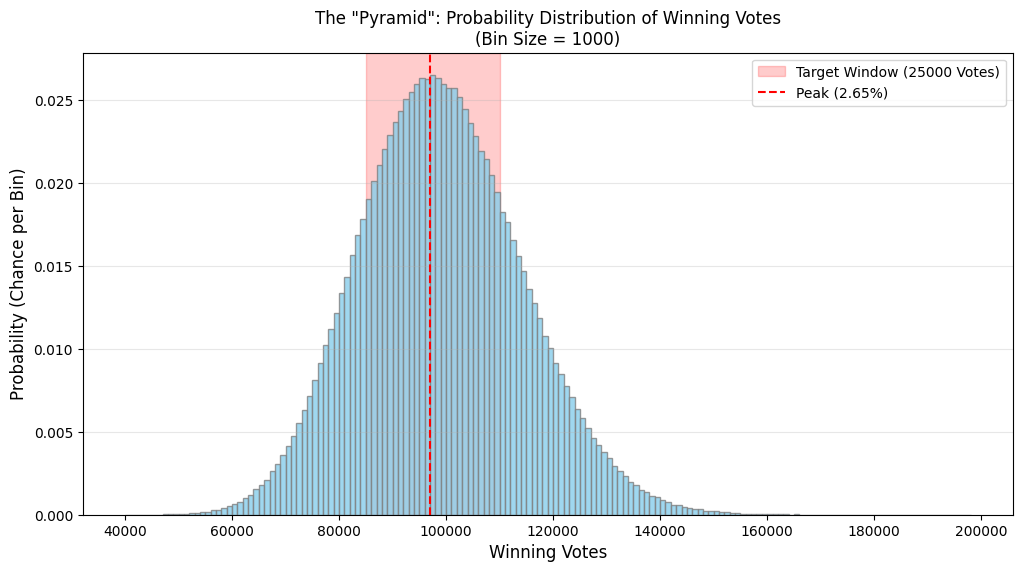

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# --- 1.A. CONFIGURATION For Vote Range and Winning Percentage Ranges if using Universal distribution---
# Total Votes Range (Uniform)
v_min = 160000
v_max = 260000

# Winning Percentage Range (Uniform)
w_min = 0.38  # 38%
w_max = 0.58  # 58%

# Simulation Settings
n_sims = 1000000  # 1 million trials for a smooth curve
bin_width = 1000  # We want to know the chance per 1k bucket (need not have fixed buckets, a range of 1000 votes for each should be good enough for this purpose)

# --- 2. THE GENERATOR ---
# Generate random data
np.random.seed(44)
#TotalVotes = np.random.uniform(v_min, v_max, n_sims)
#WinShare = np.random.uniform(w_min, w_max, n_sims)


# --- 1.B. CONFIGURATION For Vote Range and Winning Percentage Ranges if using normal distribution: This one is more accurate in reflecting given data set realities---

mu_v = 206500    # Example Mean Total Votes
sigma_v = 23000  # Example Std Dev Total Votes
mu_w = 0.48      # Example Mean Winning Share
sigma_w = 0.05   # Example Std Dev Winning Share

TotalVotes = np.random.normal(mu_v, sigma_v, n_sims)
WinShare = np.random.normal(mu_w, sigma_w, n_sims)



# Calculate Winning Votes
WinningVotes = TotalVotes * WinShare

# --- 3. ANALYSIS ---
# Create bins covering the full range
min_bin_start = int(np.floor(WinningVotes.min() / bin_width) * bin_width)
max_bin_start = int(np.ceil(WinningVotes.max() / bin_width) * bin_width)
bins = np.arange(min_bin_start, max_bin_start + bin_width, bin_width)
# Calculate counts per bin to get probabilities
counts, _ = np.histogram(WinningVotes, bins=bins) #Ignoring the second output of Bins as we are suppying the histogram function with our own bins
probabilities = counts / n_sims


# --- 5. OUTPUT ---

# Find the Peak
peak_p = np.max(probabilities)
peak_index = np.argmax(probabilities)
peak_vote_count = bins[peak_index]


print(f"--- RESULTS ---")
print(f"Peak Probability for a single 1k bin: {peak_p:.4%} (approx 1 in {1/peak_p:.0f})")
print(f"Peak occurs around: {peak_vote_count} votes")
print(f"Average Probability (if flat): {1/len(bins):.4%}") # Though this makes little sense as we know the resultant Vote number is likely to be bell shaped with thinner edges (extreme winning Vote numbers)

#Cululative percentage around the peak

#Find culumative % under range of 25 bins near the peak bin
window_start_index = peak_index - 12
window_end_index = peak_index + 13
# Handle boundary conditions
if window_start_index < 0:
    window_start_index = 0
if window_end_index > len(probabilities):
    window_end_index = len(probabilities)

# Extract the probabilities within the defined window
window_probabilities = probabilities[window_start_index:window_end_index]
# Sum the probabilities in the window
cumulative_p_in_window = np.sum(window_probabilities)

# Identify the vote ranges for printing
start_vote_range = bins[window_start_index]
# End vote range is the start of the bin *after* the window_end_index,
# but we need to check the boundary
end_vote_range = bins[window_end_index] if window_end_index < len(bins) else bins[-1] + bin_width


print(f"--- RESULTS for CULULATIVE % in 25 bins aroud the peak ---")
print(f"Window Size: {len(window_probabilities)} bins")
print(f"Window Vote Range: {start_vote_range} to {end_vote_range}")
print(f"Cumulative Probability in {len(window_probabilities)} bins around peak: {cumulative_p_in_window:.4%}")

# --- 4. PLOTTING THE PYRAMID ---
plt.figure(figsize=(12, 6))

plt.axvspan(start_vote_range, end_vote_range, color='red', alpha=0.2,
            label=f'Target Window ({end_vote_range - start_vote_range} Votes Range)')
# Plot the histogram
plt.hist(WinningVotes, bins=bins, weights=np.ones(n_sims) / n_sims,
         color='skyblue', edgecolor='grey', alpha=0.8)

# Styling
plt.title(f'The "Pyramid": Probability Distribution of Winning Votes\n(Bin Size = {bin_width})', fontsize=12)
plt.xlabel('Winning Votes', fontsize=12)
plt.ylabel('Probability (Chance per Bin)', fontsize=12)
plt.axvline(peak_vote_count, color='red', linestyle='--', label=f'Peak ({peak_p:.2%})')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.show()